In [119]:
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot 
from pandas import DataFrame
from sklearn.model_selection import train_test_split

X, Y = make_blobs(n_samples=10000, centers=2, n_features=2)
x0 = [1]*len(Y)
for i in range(len(Y)):
    if(Y[i]==0):
        Y[i]= -1

df = DataFrame(dict(bias=x0, x=X[:,0], y=X[:,1], label=Y))
x_test, x_train, y_test, y_train = train_test_split(df, Y,test_size=0.01)




[]

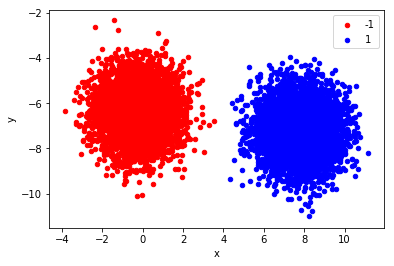

In [120]:
fig, ax = plt.subplots()
colors = {-1:'red', 1:'blue'}
grouped = x_test.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.plot()


In [121]:
df.to_csv("new13.csv")

In [122]:
import numpy as np

def perceptron_algo(x,y):
    eta = 0.0001
    flag = False
    count =0
    w = [0,0,0]
    print(" w0 ",w)
    
    print(w)
  
    for i in range(10):
        flag = True
        
        for i in range(len(x)):
            if(np.matmul(w,x.iloc[i,0:3])*y[i] <= 1):
                              
                s = np.matmul(w,x.iloc[i,0:3])*y[i]
                
                w[0]= w[0] + eta * x.iloc[i,0] * (y[i] - s)
                w[1]= w[1] + eta * x.iloc[i,1] * (y[i] - s)
                w[2]= w[2] + eta * x.iloc[i,2] * (y[i] - s)
                
                #print(w)
                flag = False
                count += 1
    print("Count", count)
    return w

#Function call

weights = perceptron_algo(x_train,y_train)





 w0  [0, 0, 0]
[0, 0, 0]
Count 886


slope  -1.4248320555211076  intercept  0.1900101502609375  w  [-0.0303432628051399, 0.22753549457485353, 0.15969285200537994]


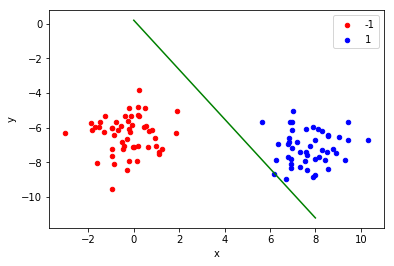

In [124]:
# Calculate line's slope and intercept
slope = -(weights[1]/weights[2])  
intercept = -weights[0]/weights[2]

#Plot data on graph
print("slope ",slope, " intercept ",intercept," w ",weights)
colors = {-1:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = x_train.groupby('label')
linespan = np.linspace(0,8 , 10000)
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

#Final hypothesis g(x) green line
pyplot.plot(linespan, slope*linespan +intercept, '-g') 

# Target function f(x) Yello Line
#pyplot.plot(linespan, 0.1*linespan -0 , '-y') 